In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from joblib import dump
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_csv("features.csv")

In [9]:
mark_list = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df["CPI"] = df['CPI'].fillna(np.nanmean(df['CPI'].unique()))
df["Unemployment"] = df['Unemployment'].fillna(np.nanmean(df['Unemployment'].unique()))
df[mark_list] = df[mark_list].fillna(0)

In [6]:
df1 = pd.read_csv("stores.csv")

In [10]:
df2 = pd.merge(df, df1, on='Store')
df2.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [11]:
df3 = pd.read_csv("train.csv")

In [12]:
df = pd.merge(df2, df3, on=['Store', 'Date', 'IsHoliday'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.to_csv('Full_Walmart_Data_After_Cleaning.csv', index=False)

In [16]:
df = pd.read_csv("Full_Walmart_Data_After_Cleaning.csv")
df.Date = pd.to_datetime(df.Date)
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38


In [17]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Type                    object
Size                     int64
Dept                     int64
Weekly_Sales           float64
dtype: object

/home/leeladhar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


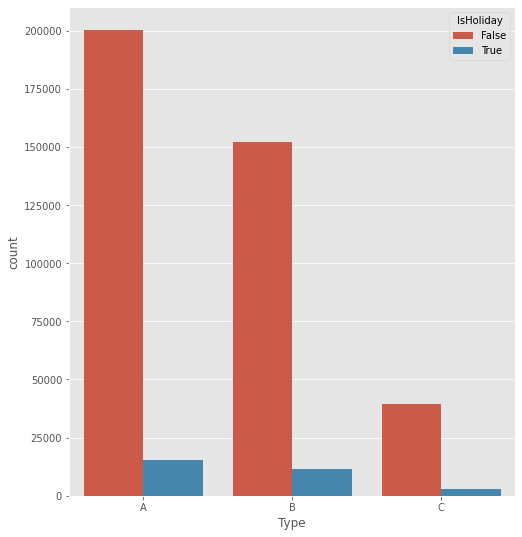

In [18]:
plt.figure(figsize=(8,9))
plt.style.use('ggplot')
sns.countplot(df['Type'], hue=df['IsHoliday'])
plt.show()

In [19]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

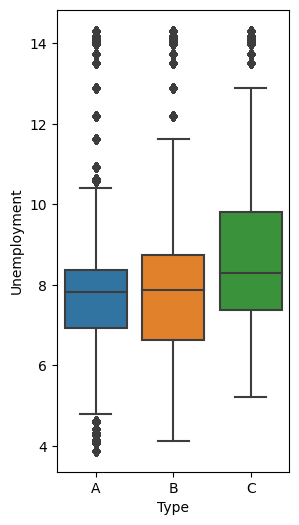

In [20]:
plt.style.use('default')
plt.figure(figsize =(3,6))
sns.boxplot(x='Type',y='Unemployment', data=df)
plt.show()

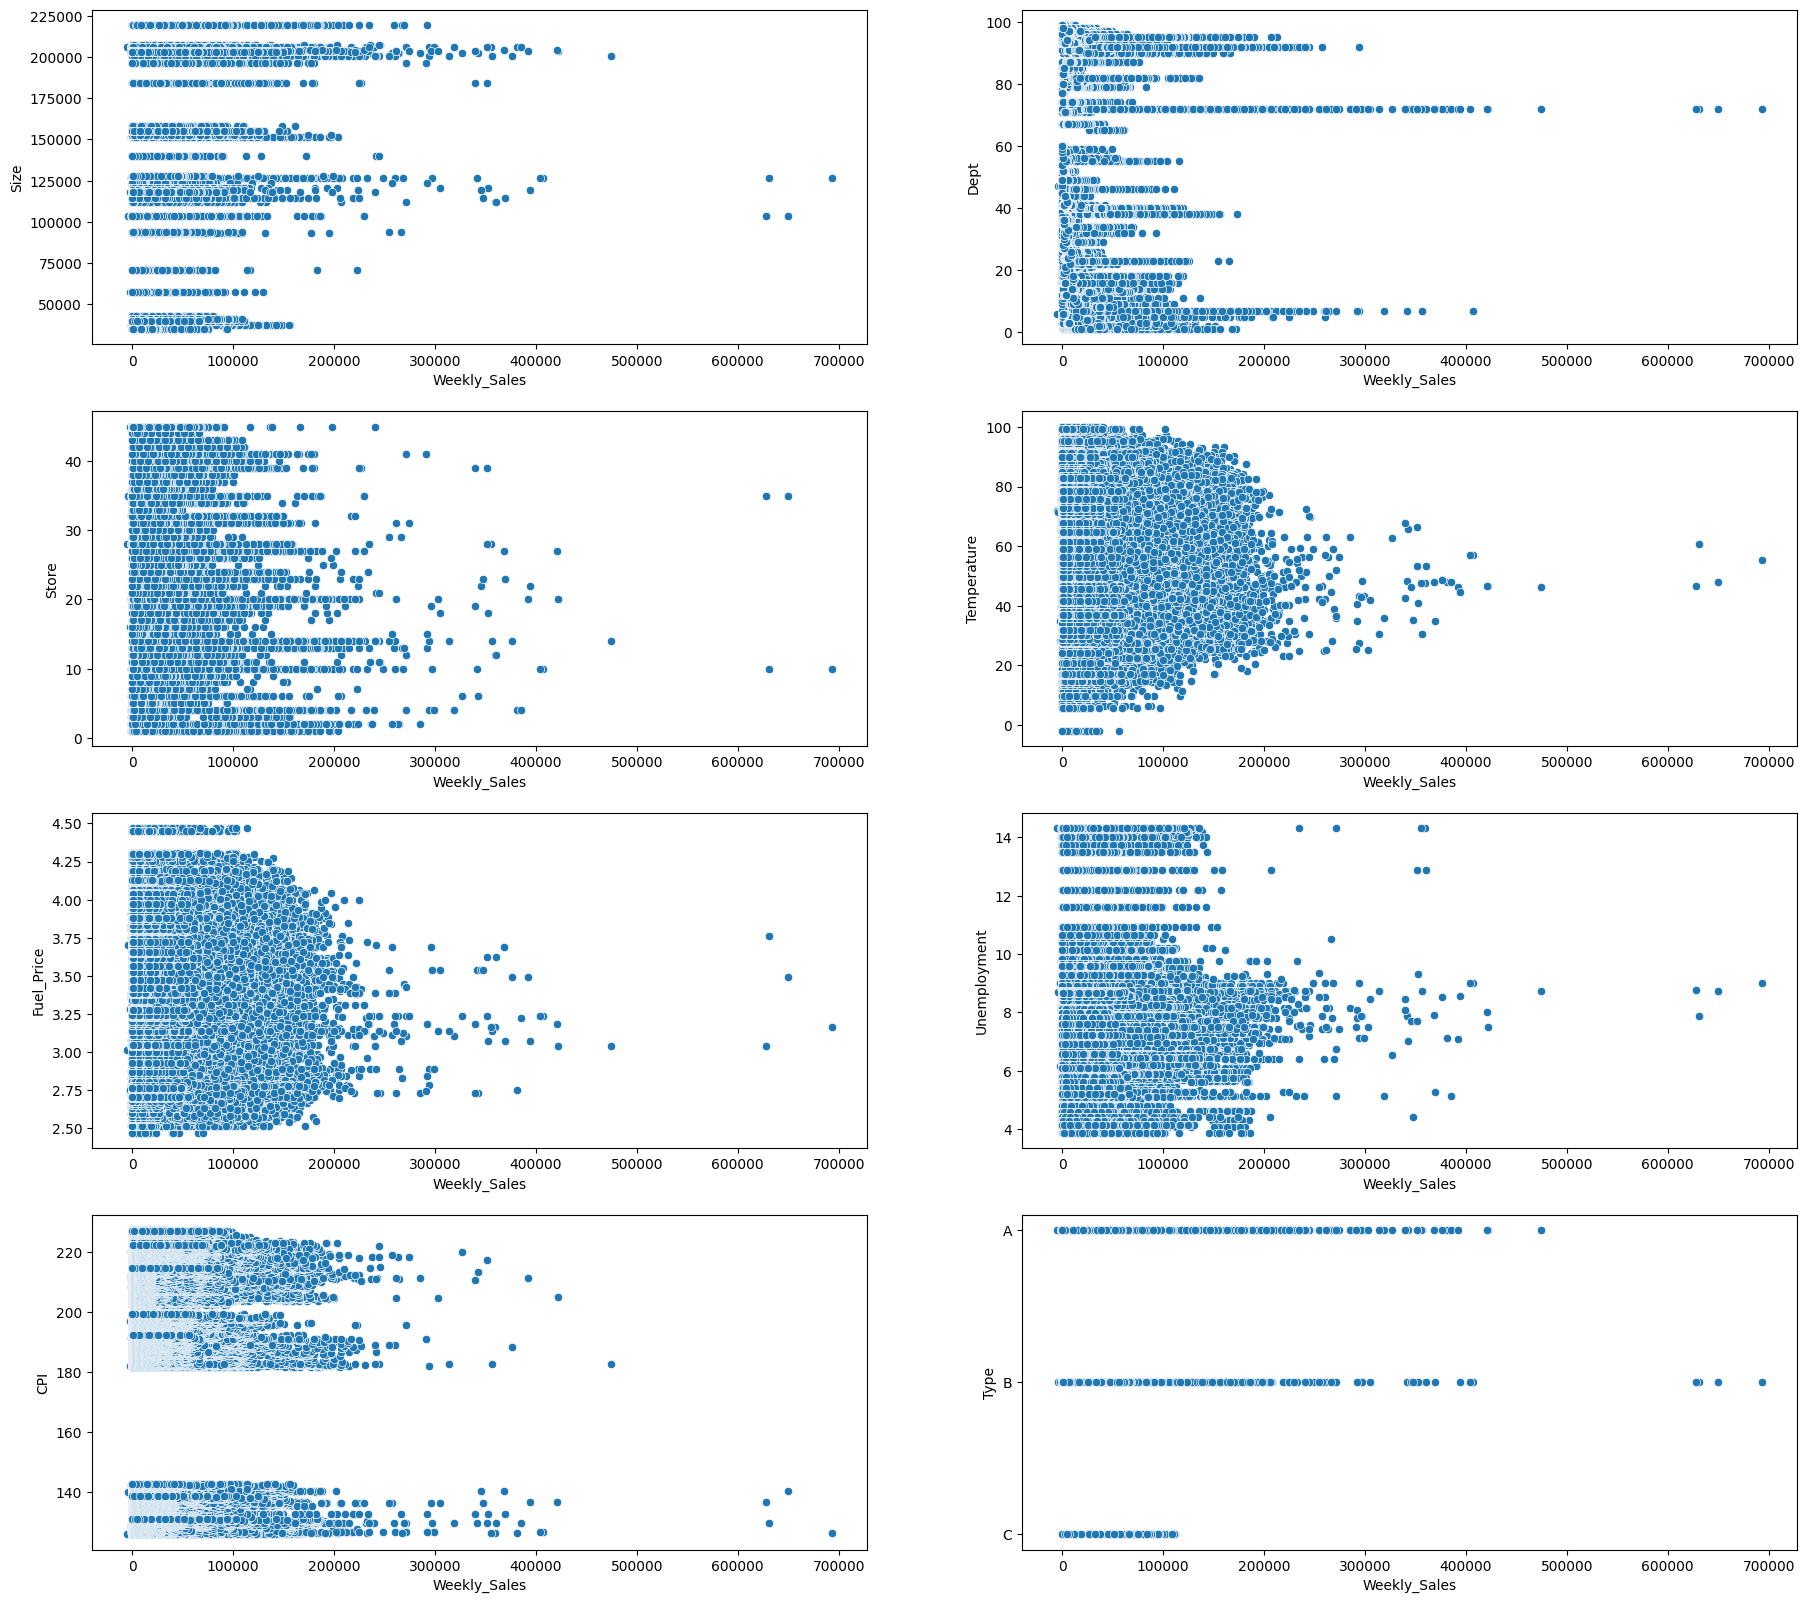

In [21]:
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(22,20))
sns.scatterplot(x = "Weekly_Sales", y = "Size", data=df, ax=ax[0][0])
sns.scatterplot(x = "Weekly_Sales", y = "Dept", data=df, ax=ax[0][1])
sns.scatterplot(x = "Weekly_Sales", y = "Store",data=df, ax=ax[1][0])
sns.scatterplot(x = "Weekly_Sales", y = "Temperature", data=df, ax=ax[1][1])
sns.scatterplot(x = "Weekly_Sales", y = "Fuel_Price", data =df, ax=ax[2][0])
sns.scatterplot(x = "Weekly_Sales", y = "Unemployment",data=df, ax=ax[2][1])
sns.scatterplot(x = "Weekly_Sales", y = "CPI",data=df, ax=ax[3][0])
sns.scatterplot(x = "Weekly_Sales",y = "Type", data=df, ax=ax[3][1])
plt.show()

In [22]:
df['Day'] = df.Date.dt.day
df['Week'] = df.Date.dt.week
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year

<ipython-input-22-db9e9b465362>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df.Date.dt.week


In [23]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Day,Week,Month,Year
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50,5,5,2,2010
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27,5,5,2,2010
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12,5,5,2,2010
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04,5,5,2,2010
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38,5,5,2,2010


In [24]:
df.drop('Date', axis = 1, inplace=True)
df.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Day,Week,Month,Year
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,1,24924.50,5,5,2,2010
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,2,50605.27,5,5,2,2010
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,3,13740.12,5,5,2,2010
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,4,39954.04,5,5,2,2010
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315,5,32229.38,5,5,2,2010


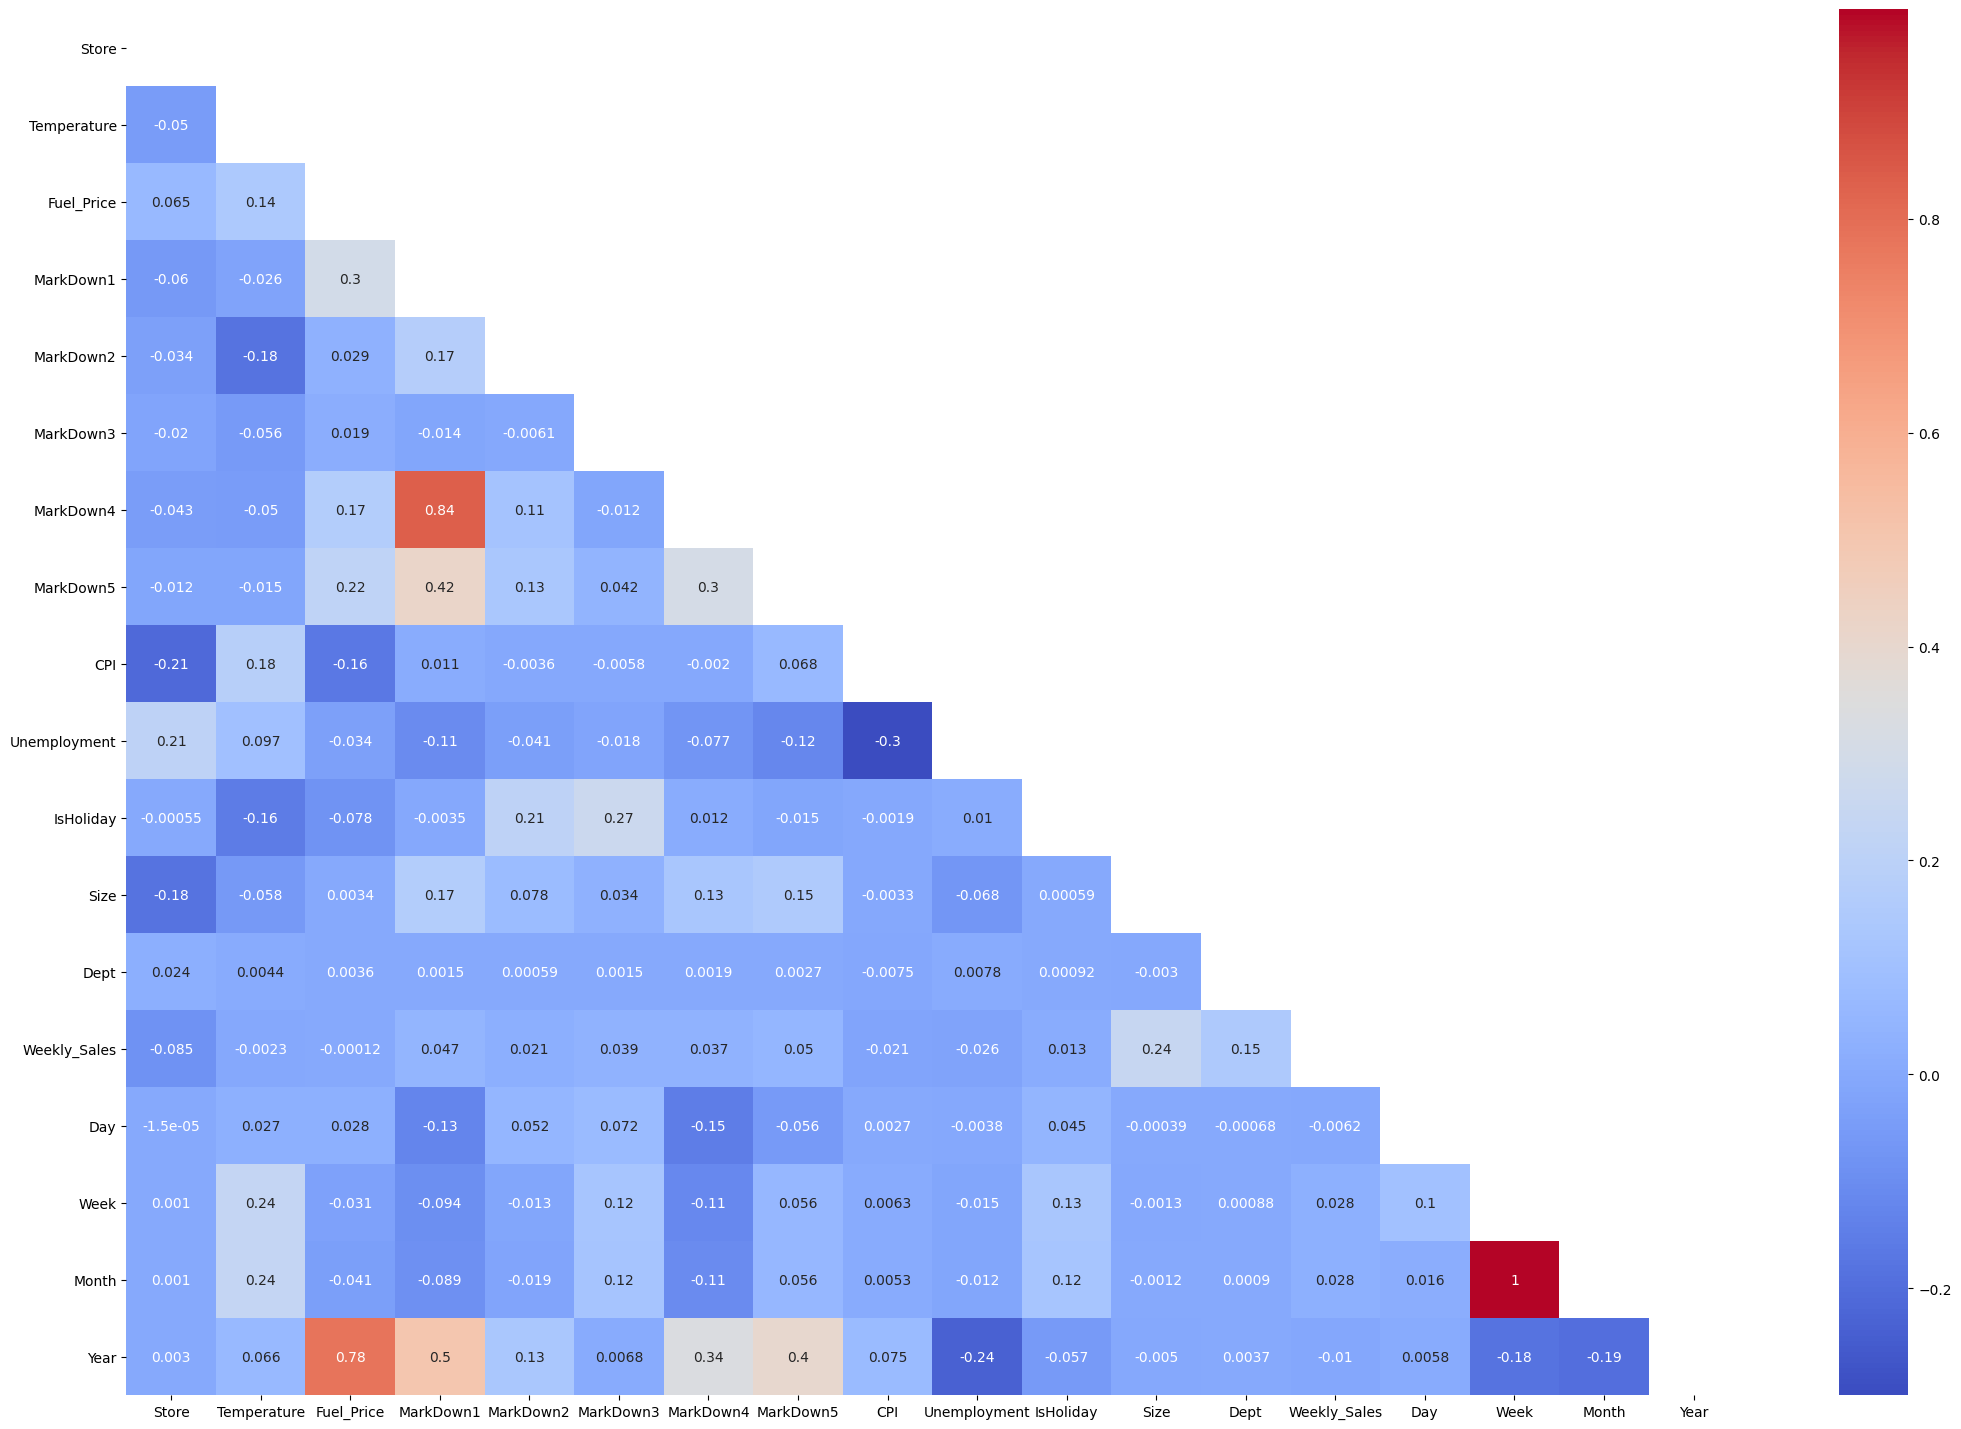

In [25]:
cor = df.corr()
mask = np.triu(np.ones_like(cor))

plt.figure(figsize=(26,18))
sns.heatmap(cor,annot=True,cmap="coolwarm", mask=mask)
plt.show()

In [26]:
df.to_csv('fullData.csv', index=False)
df.drop(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Week', 'Year', 'Month','MarkDown1'], axis =1, inplace=True)
df.head()

,Store,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Type,Size,Dept,Weekly_Sales,Day
0,1,0.0,0.0,0.0,0.0,False,A,151315,1,24924.50,5
1,1,0.0,0.0,0.0,0.0,False,A,151315,2,50605.27,5
2,1,0.0,0.0,0.0,0.0,False,A,151315,3,13740.12,5
3,1,0.0,0.0,0.0,0.0,False,A,151315,4,39954.04,5
4,1,0.0,0.0,0.0,0.0,False,A,151315,5,32229.38,5


In [27]:
le1 = LabelEncoder()
df["Type"] = le1.fit_transform(df["Type"])
df.head()

,Store,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Type,Size,Dept,Weekly_Sales,Day
0,1,0.0,0.0,0.0,0.0,False,0,151315,1,24924.50,5
1,1,0.0,0.0,0.0,0.0,False,0,151315,2,50605.27,5
2,1,0.0,0.0,0.0,0.0,False,0,151315,3,13740.12,5
3,1,0.0,0.0,0.0,0.0,False,0,151315,4,39954.04,5
4,1,0.0,0.0,0.0,0.0,False,0,151315,5,32229.38,5


In [28]:
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)

In [29]:
n_list = ['MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size']
max_val = df[n_list].max().copy()
min_val = df[n_list].min().copy()
df[n_list] = (df[n_list] - min_val) / (max_val - min_val)
df.head()

,Store,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,Type,Size,Dept,Weekly_Sales,Day
0,1,0.002536,0.000205,0.0,0.0,False,0,0.630267,1,24924.50,5
1,1,0.002536,0.000205,0.0,0.0,False,0,0.630267,2,50605.27,5
2,1,0.002536,0.000205,0.0,0.0,False,0,0.630267,3,13740.12,5
3,1,0.002536,0.000205,0.0,0.0,False,0,0.630267,4,39954.04,5
4,1,0.002536,0.000205,0.0,0.0,False,0,0.630267,5,32229.38,5


In [30]:
train_x = df_train.drop(columns='Weekly_Sales')
test_x = df_test.drop(columns='Weekly_Sales')
train_y = df_train.Weekly_Sales
test_y = df_test.Weekly_Sales

In [31]:
pf = PolynomialFeatures(degree=2)
df_poly = pf.fit_transform(train_x)

In [32]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [33]:
print(lr.score(test_x, test_y))

0.08565487153552076


In [34]:
pred = lr.predict(test_x)
print('RMSE Error:- ')
np.sqrt(mean_squared_error(test_y, pred))

RMSE Error:- 


21500.864024301667

In [35]:
tr = KNeighborsRegressor()

In [36]:
tr.fit(train_x, train_y)

KNeighborsRegressor()

In [37]:
print(tr.score(test_x, test_y))

0.5759559748550247


In [38]:
dump(tr, 'm2.joblib')

['m2.joblib']

In [39]:
pred = tr.predict(test_x)
print('RMSE Error:- ')
np.sqrt(mean_squared_error(test_y, pred))

RMSE Error:- 


14642.199138767592

In [40]:
pr = RandomForestRegressor()

In [41]:
pr.fit(train_x, train_y)

RandomForestRegressor()

In [42]:
print(pr.score(test_x, test_y))

0.9088453557905936


In [43]:
pred = pr.predict(test_x)
print('RMSE Error:- ')
np.sqrt(mean_squared_error(test_y, pred))

RMSE Error:- 


6788.756554345294

In [44]:
dump(le1, "label_encode.joblib")

['label_encode.joblib']

In [45]:
dump(pr, "model.joblib")

['model.joblib']

In [46]:
a = np.array([1, 0.05, 0.4, 0.6, 0, 1, 1, 45987, 34, 7])

In [47]:
pr.predict(np.array(a).reshape(1, -1))[0]

2692.670500000001

In [48]:
pr.n_features_

10

In [49]:
a.reshape(1, -1).shape

(1, 10)